In [176]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import folium
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from pyproj import Proj, transform

In [149]:
df = pd.read_json("./data/norge.geojson")
fylker = df["administrative_enheter.fylke"]["features"]

gdf = gpd.GeoDataFrame.from_features(fylker)

In [150]:
for fylke in fylker:
    print(fylke["properties"]["fylkesnummer"] + " - " + fylke["properties"]["navn"][0]["navn"])

42 - Agder
03 - Oslo
54 - Troms og Finnmark
15 - Møre og Romsdal
38 - Vestfold og Telemark
50 - Trøndelag
11 - Rogaland
34 - Innlandet
30 - Viken
18 - Nordland
46 - Vestland


<AxesSubplot: >

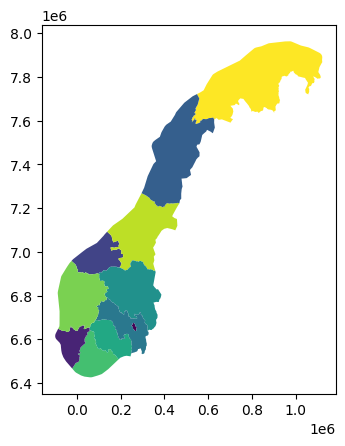

In [151]:
gdf.plot(column='fylkesnummer', cmap='viridis')

In [152]:
df_locations = pd.read_json("./data/locations.json")
df_locations.describe

<bound method NDFrame.describe of             lat        lng
0     69.801903  18.768557
1     61.106873  10.461550
2     64.824326  11.310326
3     66.146843  13.829979
4     61.601246   7.291494
...         ...        ...
3730  59.024193   7.001398
3731  68.733513  16.193760
3732  60.969337   6.505546
3733  69.599846  19.321306
3734  59.238232   7.471234

[3735 rows x 2 columns]>

In [155]:
df_locations['fylkesnummer'] = [None]*df_locations['lat'].size

In [156]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:25833')

for index in df_locations.index:
    point = Point(transform(inProj,outProj, df_locations['lng'][index], df_locations['lat'][index]))
    for i in gdf.index:
        polygon = gdf['geometry'][i]
        if polygon.contains(point):
            df_locations['fylkesnummer'][index] = int(gdf['fylkesnummer'][i])

c:\Users\sande\Desktop\repos\norwai\env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\sande\Desktop\repos\norwai\env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sande\AppData\Local\Temp\ipykernel_1304\417748906.py:5: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

In [157]:
df_locations.to_json('data/locations_county.json', orient='records')

In [178]:
viridis = cm.get_cmap('viridis', 12)
cmap = viridis(range(11))
FYLKESNUMMER_INDEX = [42, 3, 54, 15, 38, 50, 11, 34, 30, 18, 46]

m = folium.Map((64.9701, 13.509217), zoom_start=4)
for i in df_locations.index:
    if df_locations['fylkesnummer'][i] == None:
        continue
    color = colors.rgb2hex(cmap[FYLKESNUMMER_INDEX.index(df_locations['fylkesnummer'][i])])
    folium.CircleMarker(location=(df_locations['lat'][i], df_locations['lng'][i]), radius=1, color=color,
                     fill_color=color, ).add_to(m)
m